In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

from bs4 import BeautifulSoup
import requests
import urllib
from urllib.request import urlopen
from urllib.parse import urljoin


In [4]:
def count(x):
    if len(x)==0:
        return 0
    else:
        return 1

In [39]:
def indeed_scrape(link,num_pages):
    #replace with csv file
    skill_tech = ['Excel']
    df1 = pd.DataFrame([],columns=skill_tech)
    
    for i in range(num_pages):
        page = urlopen(link)
        # Using the lxml parser
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(attrs = {'rel':['nofollow']})
        for j in matches:
#             grabbing the specific job description link 
            jdURL = "https://indeed.com/m/"+j['href']
            response = requests.get(jdURL)
#         Page of job description
            jdPage = response.text
            jdSoup = BeautifulSoup(jdPage,'lxml')
            jdDes = jdSoup.findAll('div',attr={'id':['desc']})
            
            # more practice:
            countS = re.findall(r'[\/b\/]?[Ee]xcel[\/\s,]?', str(jdDes))
            countNum = count(countS)
            sumCount =0
            sumCount = sumCount + countNum
            df = pd.DataFrame([[sumCount]],columns = skill_tech)
            df1 = pd.concat([df,df1],axis = 0)
        url_all = soup.findAll(attrs = {'rel':['next']})
        print(url_all)
        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    df1.reset_index(inplace = True)
    df1.drop('index', inplace = True,axis = 1)
    df2 = df1.sum(axis=0)
    df3 = pd.DataFrame(df2,columns = ['Count'])
    df3.reset_index(inplace = True)
    df3.rename({'index':'language'}, inplace = True, axis = 1)
    t_jobs = len(df1)
    print('Total_Jobs:', len(df1))
    return(df1,df3,t_jobs)
    


In [41]:
num_pages = 10
link ='https://www.indeed.com/m/jobs?q=data+science&l='
nw,nw_count ,total_jobs = indeed_scrape(link,num_pages)

[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=9" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
Total_Jobs: 107


In [59]:
print(type(nw))
print(nw)
print(nw_count)
print(total_jobs)

<class 'pandas.core.frame.DataFrame'>
    Excel
0       0
1       0
2       0
3       0
4       0
..    ...
102     0
103     0
104     0
105     0
106     0

[107 rows x 1 columns]
  language  Count
0    Excel    0.0
107


In [54]:
def custom_plot(x,total,title):
    sns.set()
    print("")
    plt.figure(figsize =(12,8))
    sns.barplot(x='Count', y = 'language', data = x).set_title(title,fontsize = 20)
    plt.xlabel("Skill",fontsize =15)
    plt.ylabel('Count :'+str(total_jobs), fontsize =15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 1.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')

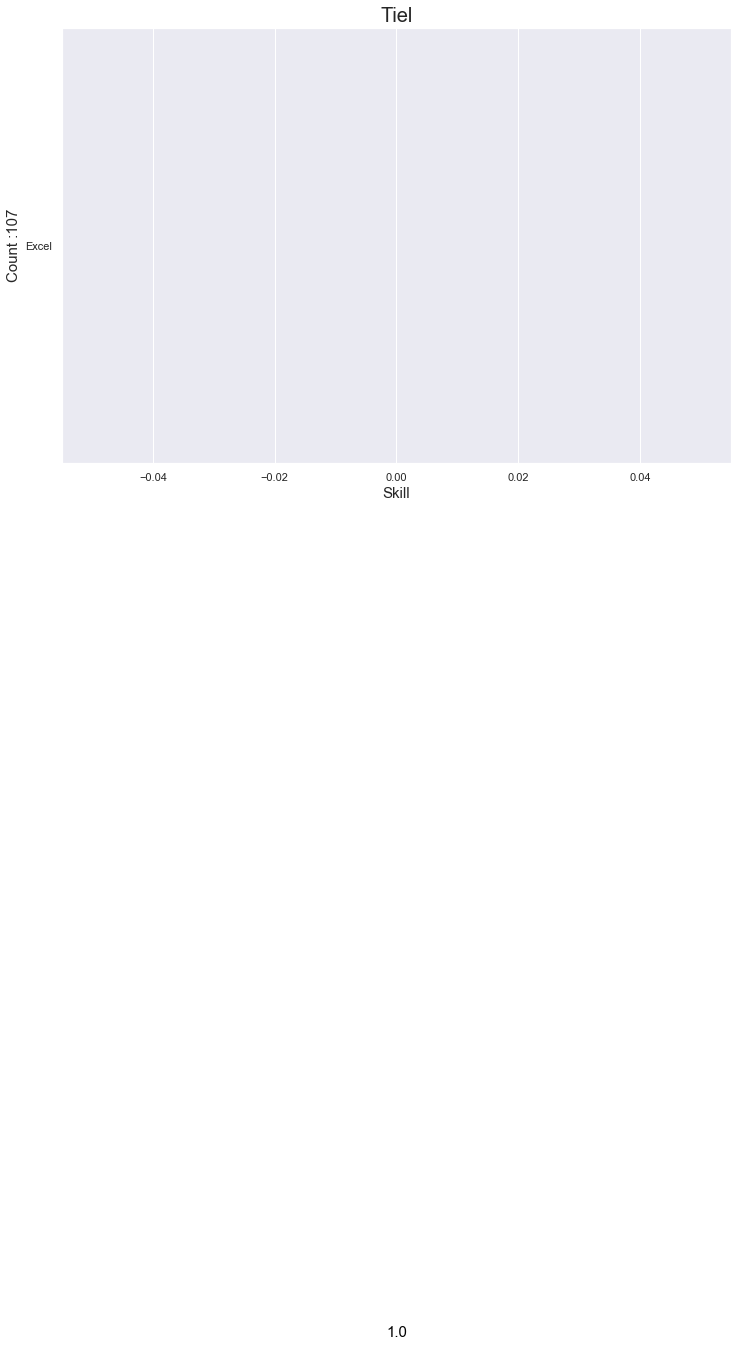

In [55]:
custom_plot(nw_count,total_jobs,"Tiel")